In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("C:/Users/ahahm/Desktop/machine learning/lesson2/homeprices.csv")

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df.bedrooms.median()

4.0

In [5]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
reg=linear_model.LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df["price"])


LinearRegression()

In [7]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [8]:
reg.intercept_

221323.00186540408

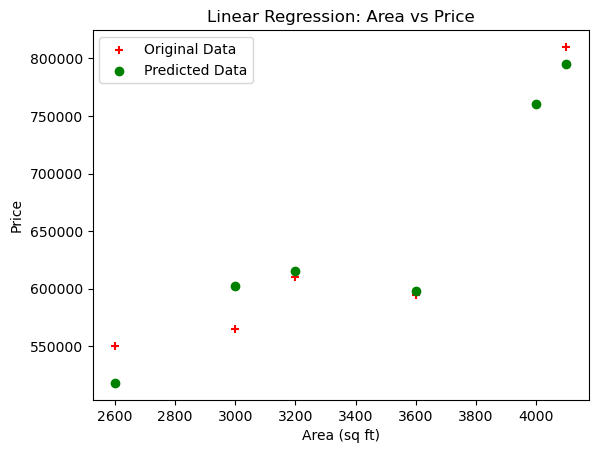

In [20]:
import matplotlib.pyplot as plt

# تدريب النموذج على البيانات الجديدة
reg.fit(df[["area", "bedrooms", "age"]], df["price"])

# إضافة توقعات النموذج إلى DataFrame
data_new_predict = df.copy().drop("price", axis="columns")
data_new_predict["predicted price"] = reg.predict(data_new_predict[["area", "bedrooms", "age"]])

# رسم النقاط الأصلية
plt.scatter(df["area"], df["price"], color="red", label="Original Data", marker="+")

# رسم نقاط التوقعات
plt.scatter(data_new_predict["area"], data_new_predict["predicted price"], color="green", label="Predicted Data", marker="o")

# إضافة العناوين والتسميات
plt.title("Linear Regression: Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()

# عرض الرسم
plt.show()
